In [1]:
import numpy

In [6]:
np = numpy.load('ut_tfidf_ari.npy').tolist()

In [3]:
print data

[[  1.46678006e+09   1.07915173e-01   6.00000000e+00]
 [  1.46575917e+09   0.00000000e+00   1.20000000e+01]
 [  1.46088880e+09   1.16338876e-01   1.20000000e+01]
 ..., 
 [  1.46079802e+09   1.47052111e-01   2.40000000e+01]
 [  1.46010681e+09   1.29704415e-01   1.50000000e+01]
 [  1.46045449e+09   1.05951515e-01   1.40000000e+01]]


In [4]:
import pickle
with open('data') as datafile :
    data = pickle.load(datafile)

In [5]:
data[0]

{u'bathrooms': 1.5,
 u'bedrooms': 3,
 u'building_id': u'53a5b119ba8f7b61d4e010512e0dfc85',
 u'created': u'2016-06-24 07:54:24',
 'density': 57116.783216783224,
 u'description': u"A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ",
 u'display_address': u'Metropolitan Avenue',
 u'features': [],
 'int_building': [0.6666666666666666, 0.3333333333333333, 0.0, 3],
 'int_manager': [0.7444444444444445, 0.25555555555555554, 0.0, 90],
 'interest_building': [0.6666666

In [7]:
np[0]

[1466780064.0, 0.10791517320475999, 6.0]

In [9]:
def feature(json,row):
    return [
        json['bathrooms'],
        json['bedrooms'],
        json['density'],
        json['interest_building'][0],
        json['interest_building'][1],
        json['interest_building'][2],
        json['interest_building'][3],
        json['interest_manager'][0],
        json['interest_manager'][1],
        json['interest_manager'][2],
        json['interest_manager'][3],
        json['latitude'],
        json['longitude'],
        len(json['photos']),
        json['population'],
        json['price'],
        json['wage'],
        row[0],
        row[1],
        row[2]
        
    ]
    

In [11]:
X=[]
for i in range(len(data)):
    X += [feature(data[i],np[i])]

In [12]:
X[0]

[1.5,
 3,
 57116.783216783224,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 3,
 0.7444444444444445,
 0.25555555555555554,
 0.0,
 90,
 40.714500000000001,
 -73.942499999999995,
 5,
 81677,
 3000,
 9249.01367582061,
 1466780064.0,
 0.10791517320475999,
 6.0]

In [13]:
numpy.save('featureX.npy',X)

In [14]:
import pandas
d = pandas.read_json("train.json")
data1 = []
label = []
for i in range(len(d)):
    temp = {}
    for j in range(15):
        if d.columns[j] == 'interest_level':
            label.append(d.iat[i, j])
            continue
        temp[d.columns[j]] = d.iat[i, j]
    data1.append(temp)

In [15]:
label[0]

u'medium'

In [17]:
labels = ['low','medium','high']
Y = numpy.array([labels.index(x) for x in label])

In [18]:
Y

array([1, 0, 2, ..., 0, 0, 0])

In [19]:
numpy.save('labelY.npy',Y)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',multi_class='multinomial')
model.fit(X,Y)
probs = model.predict_proba(X)

In [30]:
probs[:5]

array([[ 0.69537408,  0.22715786,  0.07746806],
       [ 0.69516875,  0.22726769,  0.07756356],
       [ 0.69418777,  0.22779165,  0.07802058],
       [ 0.69420441,  0.22778277,  0.07801282],
       [ 0.694378  ,  0.22769014,  0.07793186]])

In [27]:
label[:5]

[u'medium', u'low', u'high', u'low', u'low']

In [31]:
from sklearn.metrics import log_loss
print log_loss(Y,probs)

0.788560860136


In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
model = OneVsRestClassifier(GradientBoostingClassifier())
model .fit(X, Y)
probs =model.predict_proba(X)
print log_loss(Y,probs)

0.406581124056


In [48]:
from scipy.spatial import distance 
def dist(d):
    return int(distance.euclidean((d['latitude'],d['longitude']),(40.785091, -73.968285))*10)
d = [dist(x) for x in data]

    

In [49]:
from collections import defaultdict
freq = defaultdict(list)
for i in range(len(label)):
    freq[d[i]].append(Y[i])
    

In [50]:
for key in freq:
    freq[key] = {'avg': sum(freq[key])*1.0/len(freq[key]), 'num':len(freq[key])}

In [45]:
freq[0]

{'avg': 0.38332860213309544, 'num': 49318}

In [46]:
freq[1]

{'avg': 0.0, 'num': 3}

In [55]:
items = sorted(freq.items(),key=lambda x:x[0])
print items[:5]

[(0, {'avg': 0.36125425801380034, 'num': 45796}), (1, {'avg': 0.67478467478467474, 'num': 3367}), (2, {'avg': 0.59285714285714286, 'num': 140}), (3, {'avg': 0.83333333333333337, 'num': 6}), (4, {'avg': 0.0, 'num': 4})]


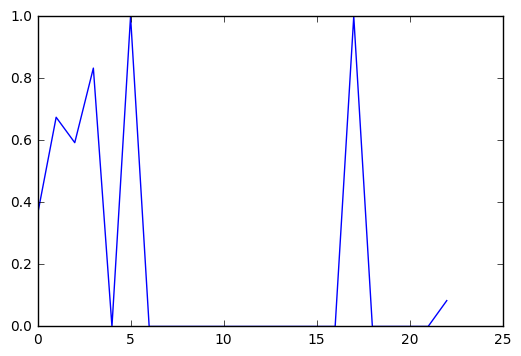

In [58]:
import  matplotlib.pyplot as plt
avg,num=[],[]
for item in items:
    avg.append(item[1]['avg'])
    num.append(item[1]['num'])
plt.plot(list(range(len(items))),avg)
plt.show()

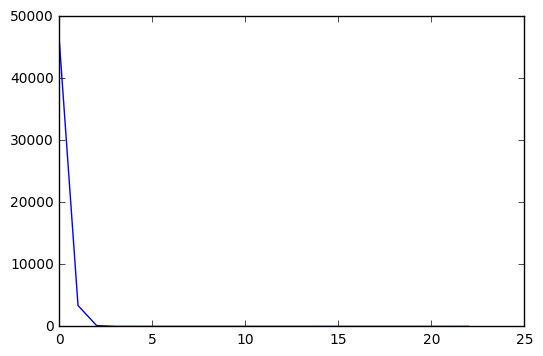

In [59]:
plt.plot(list(range(len(items))),num)
plt.show()